In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
profile_df = pd.read_csv("customer_profiles.csv")
ad_events_df = pd.read_csv("ad_events.csv")
ad_details_df = pd.read_csv("ad_details.csv")

In [3]:
transaction_df = ad_events_df[ad_events_df["event"] == "offer completed"]

In [4]:
transaction_profiles = profile_df[profile_df['id'].isin(transaction_df['customer'])]

<AxesSubplot:xlabel='age', ylabel='income'>

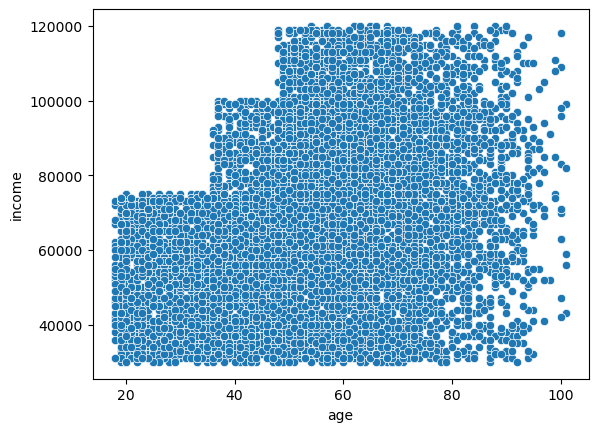

In [5]:
sns.scatterplot(data=transaction_profiles, x="age", y="income")

In [6]:
for index, row in ad_events_df.iterrows():
    # Parse the 'event_info' string into a dictionary
    event_info_dict = ast.literal_eval(row['event_info'])
    # Iterate over keys and values in the event_info dictionary
    for key, value in event_info_dict.items():
        # Create new columns dynamically for each key and assign the corresponding value
        ad_events_df.at[index, key.replace(' ', '_')] = value

In [7]:
ad_events_df.head(20)
# Assuming ad_events_df is your DataFrame


# Write the DataFrame to a CSV file
ad_events_df.to_csv("ad_events_df2.csv", index=False)



In [8]:
ad_events_df = pd.read_csv("ad_events_df2.csv")

In [17]:
def graphOffer(offer_id):
    # Filter the DataFrame for the specific offer id
    offer_df = ad_events_df[ad_events_df['offer_id'] == offer_id]

    # Group by 'time' and 'event', and count the number of occurrences
    grouped_df = offer_df.groupby(['time', 'event']).size().unstack(fill_value=0)

    # Plot the line plot
    plt.figure(figsize=(10, 6))

    # Plot the number of people who received the offer
    plt.plot(grouped_df.index, grouped_df['offer received'], label='Offer Received')

    # Plot the number of people who viewed the offer
    plt.plot(grouped_df.index, grouped_df['offer viewed'], label='Offer Viewed')

    # Plot the number of people who completed a transaction after viewing the offer
    plt.plot(grouped_df.index, grouped_df['offer completed'], label='Offer Completed')

    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Number of People')
    plt.title(f'Offer Performance Over Time (Offer ID: {offer_id})')
    plt.legend()

    # Show the plot
    plt.show()
    
    print("Completed to Viewed Ratio: "+str(grouped_df['offer completed'].sum() / grouped_df['offer viewed'].sum()))



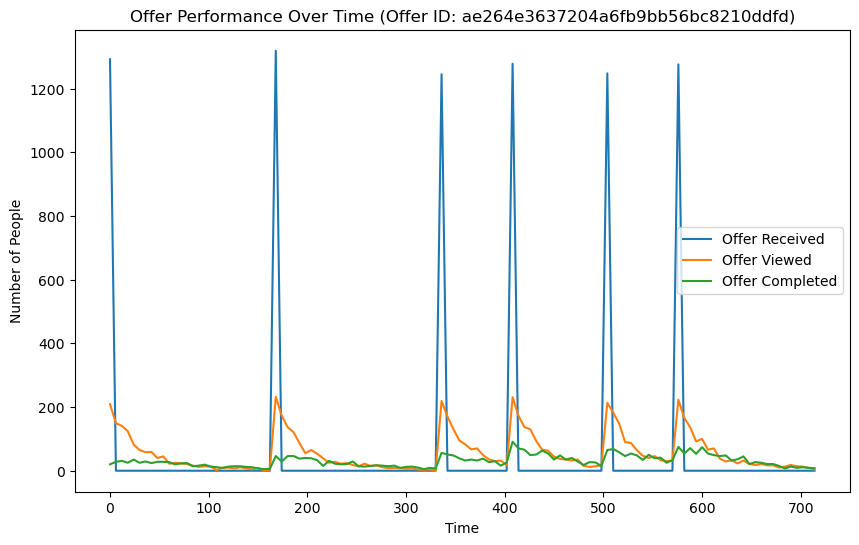

Completed to Viewed Ratio: 0.5491363907087552


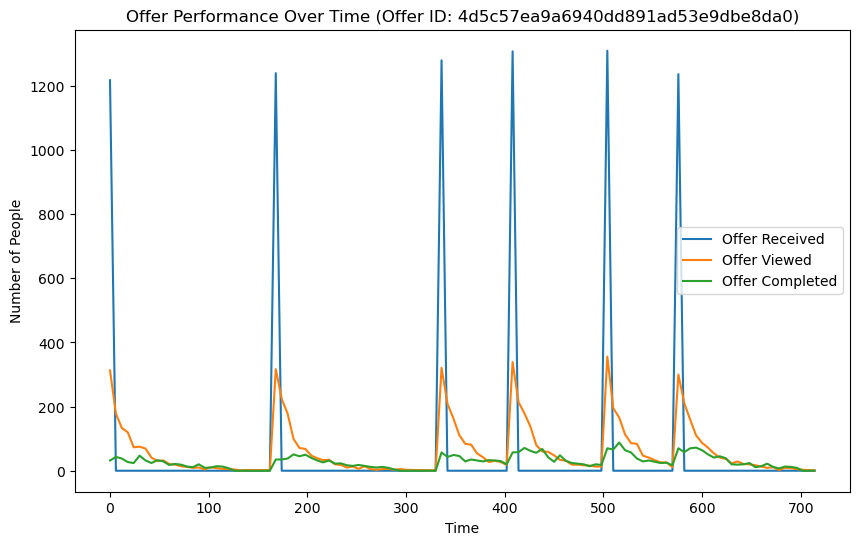

Completed to Viewed Ratio: 0.4564264181967662


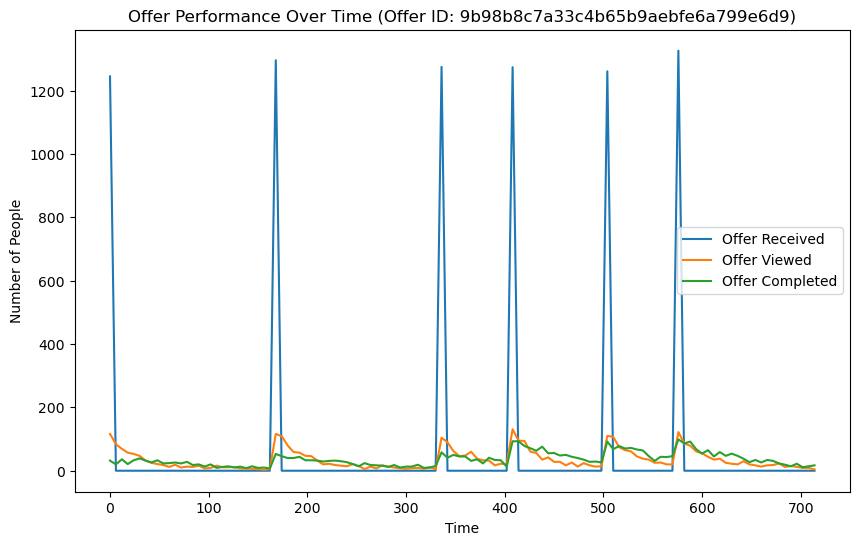

Completed to Viewed Ratio: 1.0438743706545193


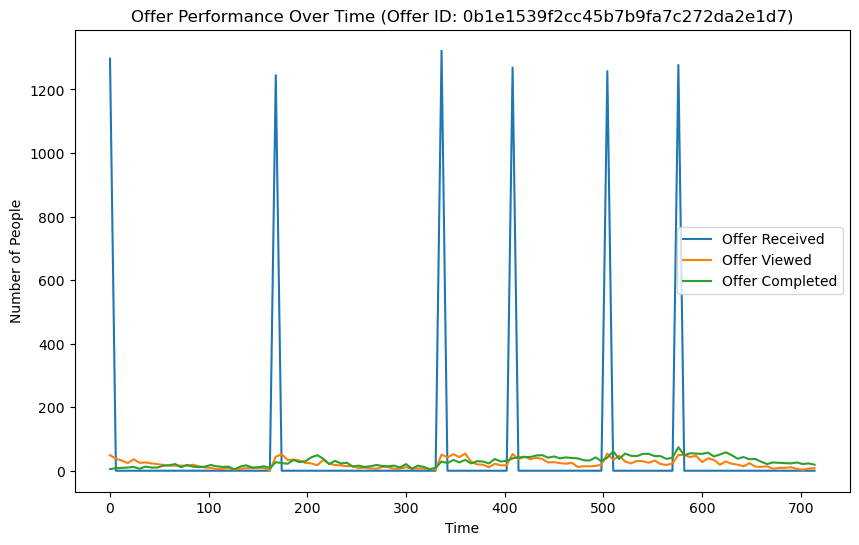

Completed to Viewed Ratio: 1.284265865565152


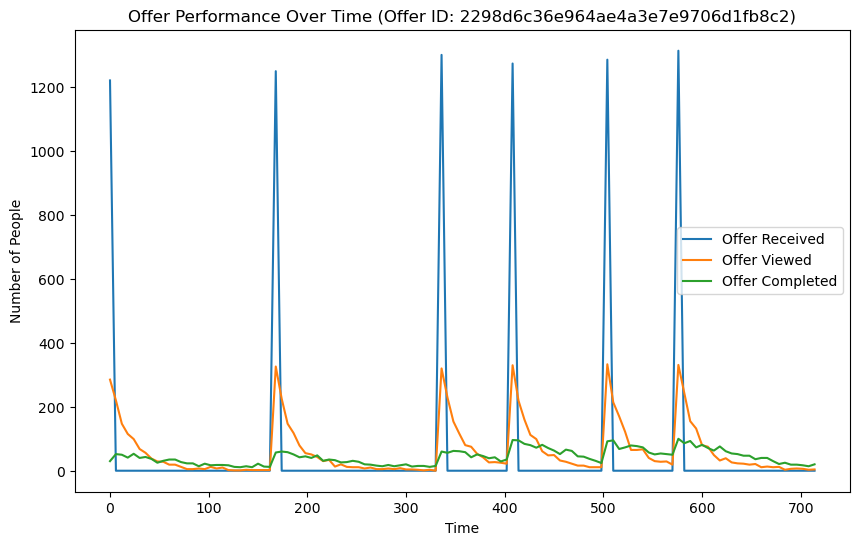

Completed to Viewed Ratio: 0.7027395393212484


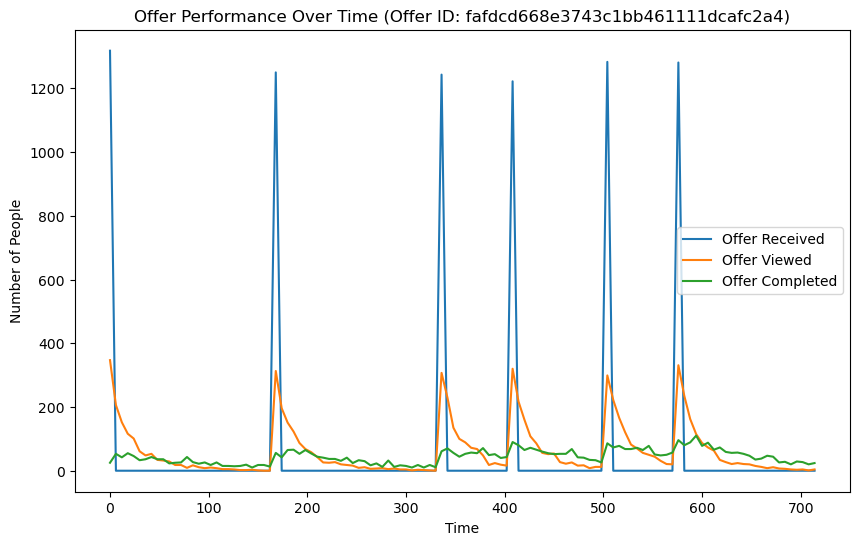

Completed to Viewed Ratio: 0.7256721714207724


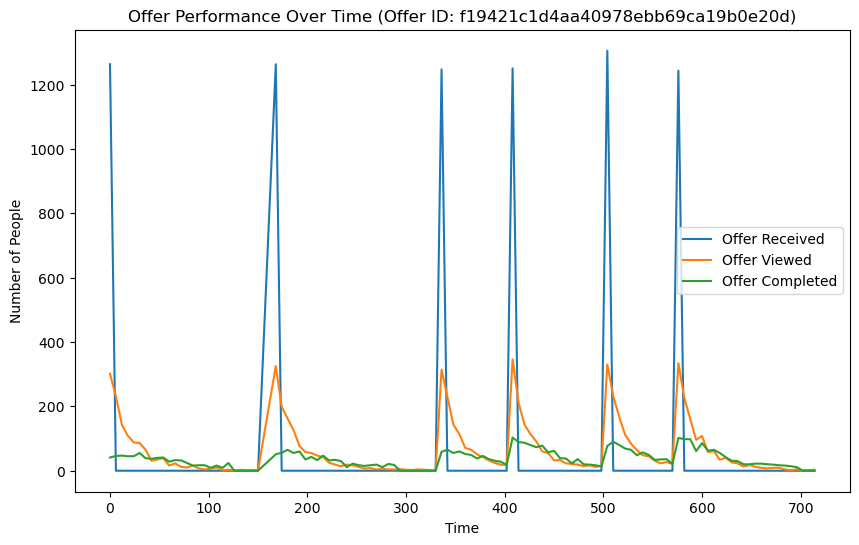

Completed to Viewed Ratio: 0.5914096916299559


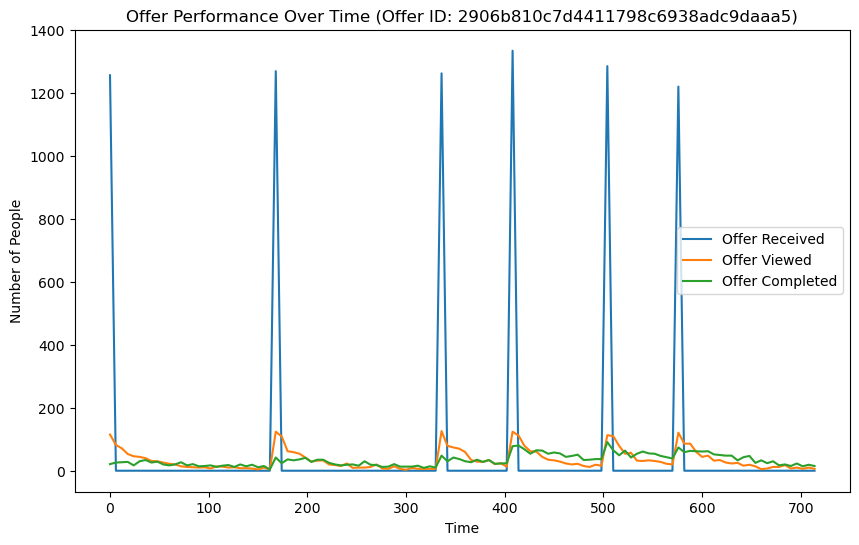

Completed to Viewed Ratio: 0.9754735308402137


In [18]:
for i, row in ad_details_df.iterrows():
    if row['offer_type'] != "informational":
        graphOffer(row['ad id'])

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def graphCustomersType(offer_id):
    # Load the customer profiles data
    customer_profiles_df = pd.read_csv("customer_profiles.csv")

    # Filter the DataFrame to include only customers who interacted with the specified offer
    offer_customers = ad_events_df[ad_events_df['offer_id'] == offer_id]['customer'].unique()

    # Create a DataFrame of customer profiles for the offer customers
    offer_customer_profiles_df = customer_profiles_df[customer_profiles_df['id'].isin(offer_customers)]

    # Count the number of unique customers for each interaction event
    offer_received = ad_events_df[(ad_events_df['offer_id'] == offer_id) & (ad_events_df['event'] == 'offer received')]['customer'].nunique()
    offer_viewed = ad_events_df[(ad_events_df['offer_id'] == offer_id) & (ad_events_df['event'] == 'offer viewed')]['customer'].nunique()
    offer_completed = ad_events_df[(ad_events_df['offer_id'] == offer_id) & (ad_events_df['event'] == 'offer completed')]['customer'].nunique()

    # Create a DataFrame to store the counts
    counts_df = pd.DataFrame({'Customer Type': ['Received', 'Received and Viewed', 'Received, Viewed, and Completed'],
                              'Count': [offer_received, offer_viewed, offer_completed]})

    # Plot the distribution of customer types
    plt.figure(figsize=(8, 6))
    counts_df.plot(kind='bar', x='Customer Type', y='Count', color='skyblue', legend=None)
    plt.title('Distribution of Customer Types')
    plt.xlabel('Customer Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

<Figure size 800x600 with 0 Axes>

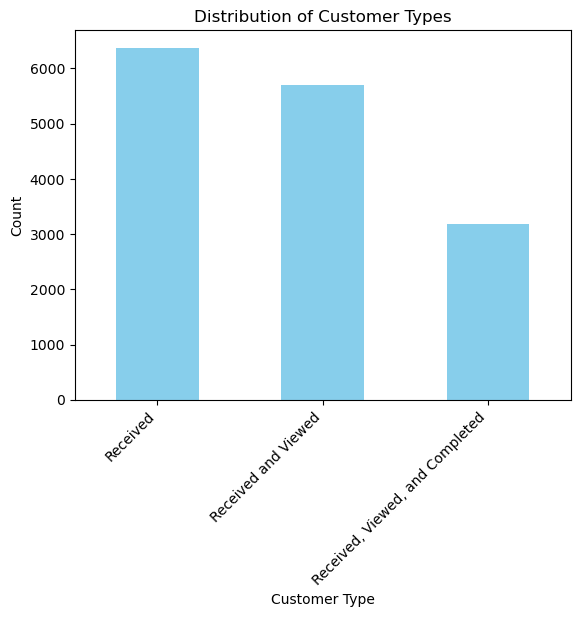

<Figure size 800x600 with 0 Axes>

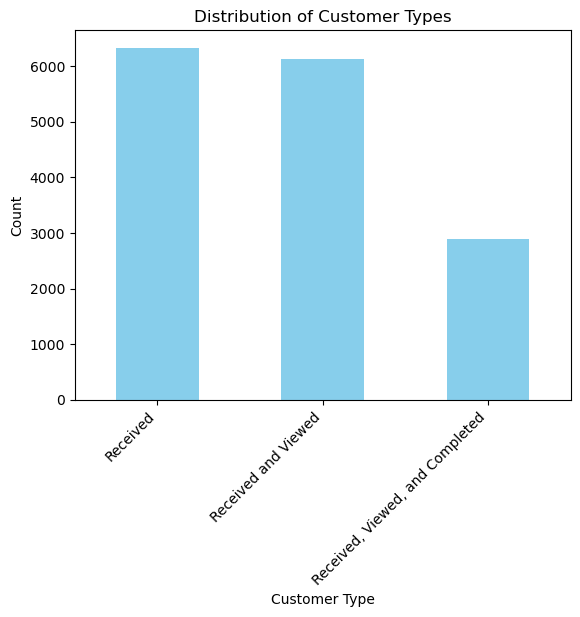

<Figure size 800x600 with 0 Axes>

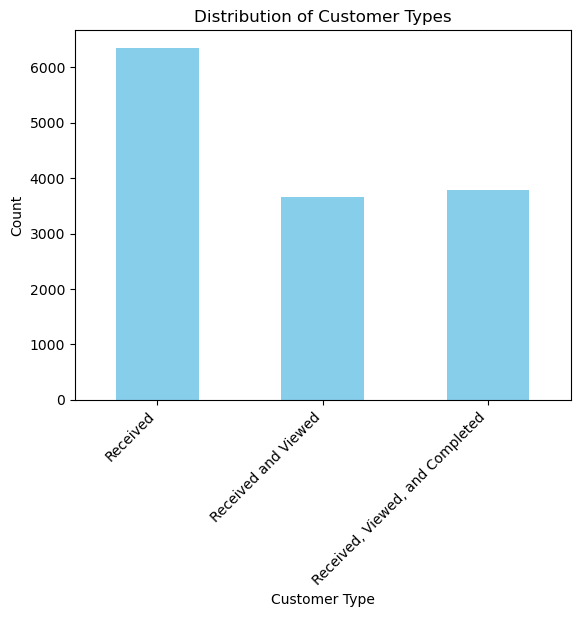

<Figure size 800x600 with 0 Axes>

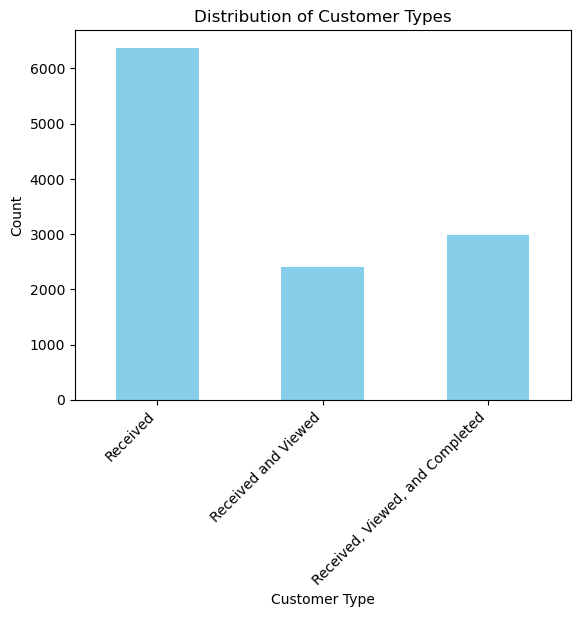

<Figure size 800x600 with 0 Axes>

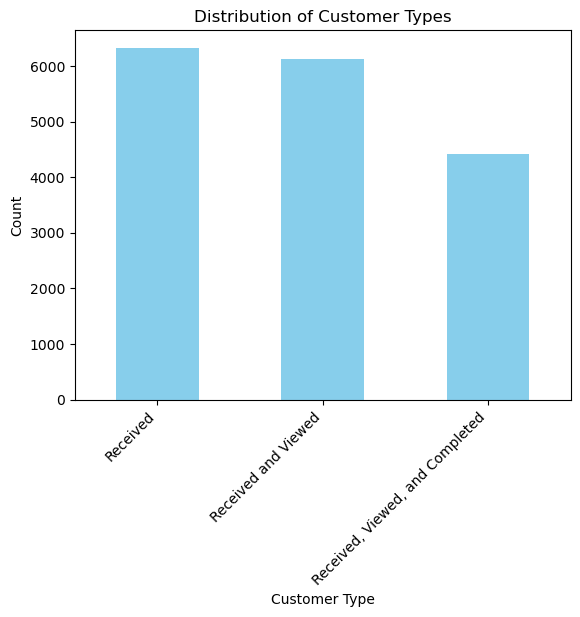

<Figure size 800x600 with 0 Axes>

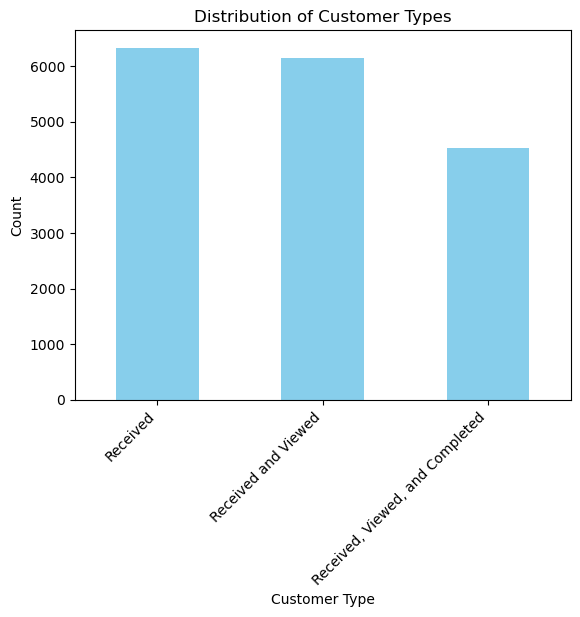

<Figure size 800x600 with 0 Axes>

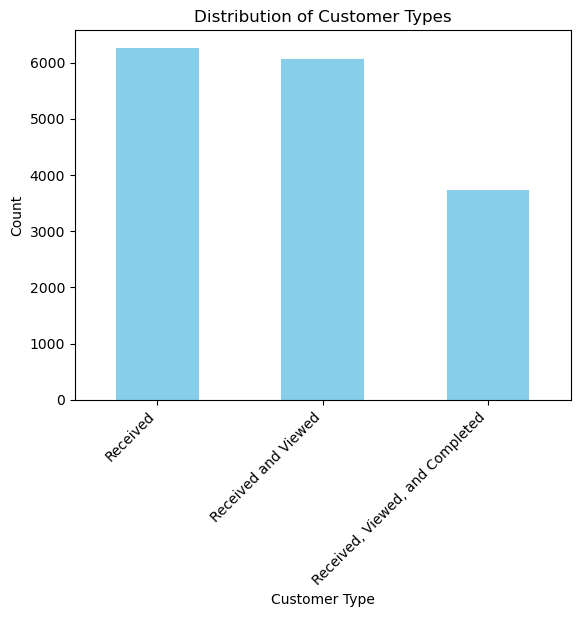

<Figure size 800x600 with 0 Axes>

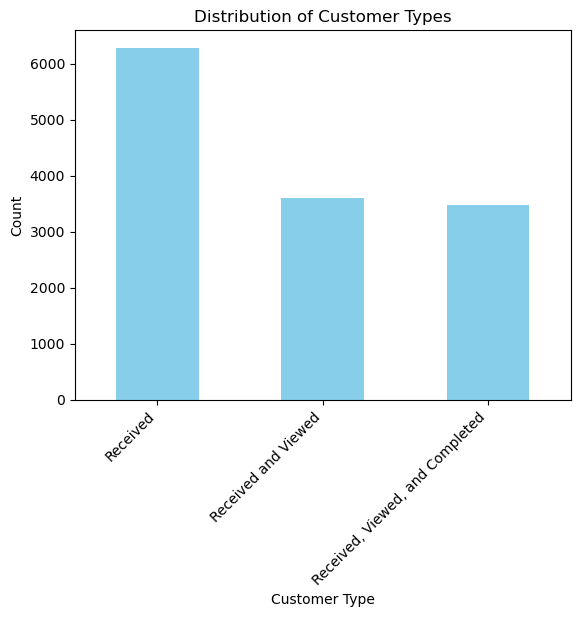

In [27]:
for i, row in ad_details_df.iterrows():
    if row['offer_type'] != "informational":
        graphCustomersType(row['ad id'])

In [32]:
def scatterCustomerProfile(offer_id):
    # Load the customer profiles data
    customer_profiles_df = pd.read_csv("customer_profiles.csv")

    # Filter the DataFrame to include only customers who interacted with the specified offer
    offer_customers = ad_events_df[ad_events_df['offer_id'] == offer_id]['customer'].unique()

    # Create a DataFrame of customer profiles for the offer customers
    offer_customer_profiles_df = customer_profiles_df[customer_profiles_df['id'].isin(offer_customers)]

    # Merge customer profiles with events DataFrame to associate each customer with their customer type
    merged_df = pd.merge(offer_customer_profiles_df, ad_events_df[['customer', 'customer_type']], on='customer', how='left')

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='income', hue='customer_type', data=merged_df, palette='colorblind')
    plt.title(f'Relationship Between Age and Income for Customers')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.legend(title='Customer Type')
    plt.show()

In [33]:
for i, row in ad_details_df.iterrows():
    if row['offer_type'] != "informational":
        scatterCustomerProfile(row['ad id'])

KeyError: "['customer_type'] not in index"